<a href="https://colab.research.google.com/github/ganuwoahh/tdlta/blob/main/Copy_of_BatchNormalization_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Previously, we learned that **activation functions** are **essential for handling non-linear data**. This is because most real-world data is non-linear. By using these functions, **we can capture and model the complex patterns and relationships that exist within the data.**

# **Batch Normalization**

Why do we need **Normalization**:
Let's consider two samples, A and B:

- \( A = [10, 20, 30] \)
- \( B = [1, 2, 3] \)

In this case, the **weight update for sample A will be much larger** than that for sample B(though both give overall same information for the model to learn).
This happens because **A has larger values**, which results in a **higher loss for A, and thus a larger gradient during backpropagation**.

Now, consider the updated vector A:

- \( A = [1, 30, 4] \)

Here, the value **30 becomes a dominant feature**, potentially leading to a disproportionately large weight being assigned to it. However, 30 might not be the most important feature in the context of the problem. Therefore, **normalization is necessary to ensure that all features are on a similar scale, preventing any one feature from disproportionately affecting the model's learning process**.

Z Score Normalization: Convert input data into  a distribution with 0  mean and unit variance.



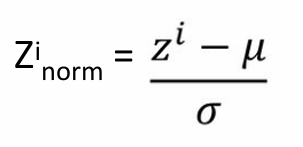

Why normalize only the raw inputs to the model and not normalize every input in subsequent layers? This is what batch normalization does—it normalizes all the inputs in subsequent layers.

But is there a need to normalize the inputs going through each layer?

Yes, as the data moves through several activation functions and weights, the distribution of the input changes, which can lead to either exploding or vanishing gradients.

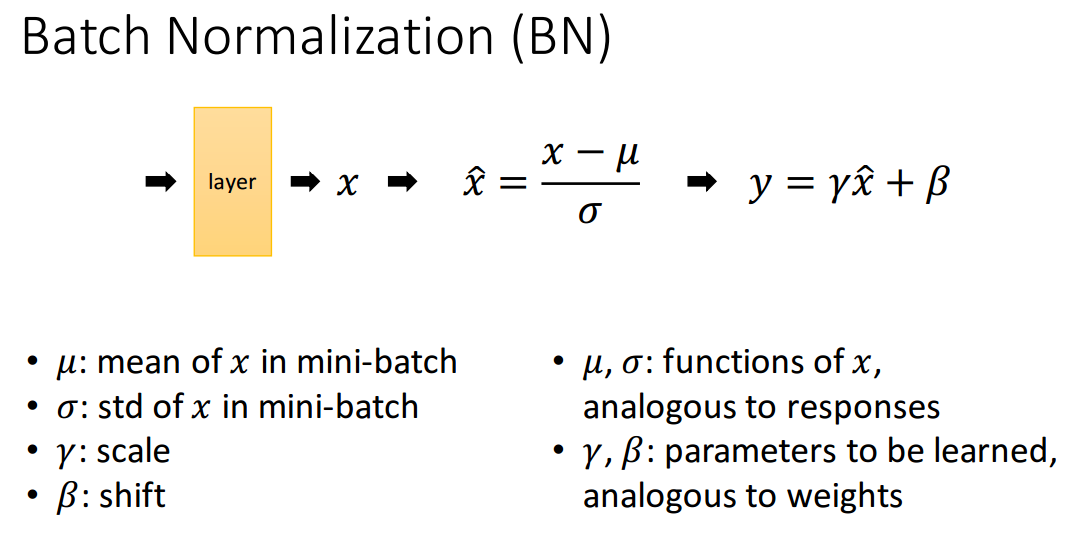

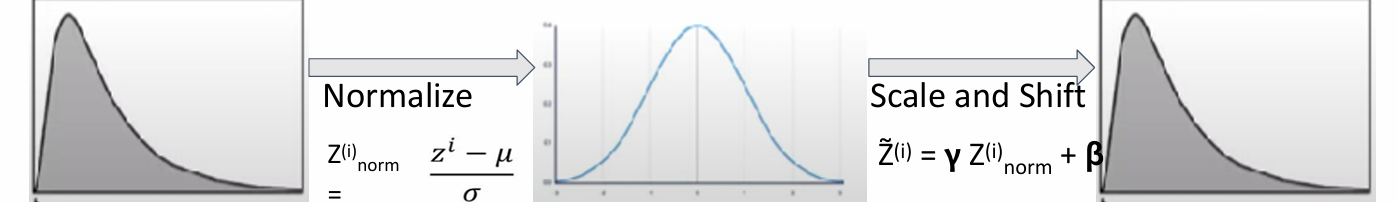

We mimic the features of the original distribution by using 𝝲(Scaling)
and 𝝱(Shifting)

Using 𝝲 and 𝝱, the network is trying to learn the overall distribution of
the training dataset even though we are passing the input as batches as well increase the training speed.


Let's look at an example:

Importing dataset and libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#keras used for building and training deep learning models
import matplotlib.pyplot as plt
import numpy as np

Cleaning of Dataset:

In [ ]:
# Load CIFAR-10 dataset The CIFAR-10 dataset

''' It consists of 60,000 32x32 color images in 10 different classes'''

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to range 0-1

# '''pixel values range from 0 to 255 '''
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding

# ''' if there are 10 classes, each label is converted into a vector of length 10,
# where the index corresponding to the class is set to 1, and all other indices are set to 0'''

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 10)


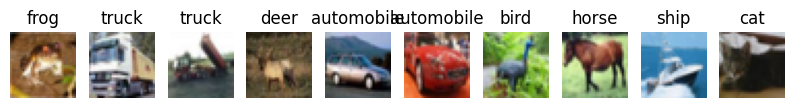

Defining the Models:

In [ ]:
def create_cnn_without_bn(): # '''We aren't performing any normalization between the layers'''
  model = models.Sequential([
          layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation='relu'),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation='relu'),
          layers.Flatten(),
          layers.Dense(64, activation='relu'),
          layers.Dense(10, activation='softmax')  # 10 classes
      ])
  return model

In [ ]:
def create_cnn_with_bn(): #'''notice that the output of each layer are normalized before passing as an input to the next layer'''
  model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(), #'''' Batch Norm ''''
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(), #'''' Batch Norm ''''
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(), #'''' Batch Norm ''''
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(), #'''' Batch Norm ''''
        layers.Dense(10, activation='softmax')  # 10 classes
    ])
  return model

In [ ]:
# Create models
model_without_bn = create_cnn_without_bn()
model_with_bn = create_cnn_with_bn()

# Compile models
for model in [model_without_bn, model_with_bn]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train models
print("Training model without Batch Normalization...")
history_without_bn = model_without_bn.fit(
    x_train, y_train, epochs=11, validation_data=(x_test, y_test), batch_size=128
)

print("Training model with Batch Normalization...")
history_with_bn = model_with_bn.fit(
    x_train, y_train, epochs=11, validation_data=(x_test, y_test), batch_size=128
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model without Batch Normalization...
Epoch 1/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 177ms/step - accuracy: 0.2897 - loss: 1.9075 - val_accuracy: 0.4706 - val_loss: 1.4539
Epoch 2/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 174ms/step - accuracy: 0.4930 - loss: 1.4046 - val_accuracy: 0.5339 - val_loss: 1.2967
Epoch 3/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.5631 - loss: 1.2366 - val_accuracy: 0.5833 - val_loss: 1.1669
Epoch 4/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 173ms/step - accuracy: 0.6133 - loss: 1.1052 - val_accuracy: 0.6224 - val_loss: 1.0612
Epoch 5/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 171ms/step - accuracy: 0.6394 - loss: 1.0330 - val_accuracy: 0.6438 - val_loss: 1.0084
Epoch 6/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 172ms/step - accuracy: 0.6660 - loss: 0.9556 - val_accuracy: 0.6717 - val_loss: 0.9350
Epoch 7/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 179ms/step - accuracy: 0.6908 - loss: 0.8945 - val_accuracy: 0.6543 - val_loss: 0.9829
Epoch 8/11
391/391 ━━━━━━━━━━━━━━━━━━

Evaluating the models:

In [ ]:
# Evaluate models
print("Evaluating model without Batch Normalization...")
test_loss_wo_bn, test_acc_wo_bn = model_without_bn.evaluate(x_test, y_test)
print(f"Test Accuracy (Without BN): {test_acc_wo_bn:.4f}")

print("Evaluating model with Batch Normalization...")
test_loss_w_bn, test_acc_w_bn = model_with_bn.evaluate(x_test, y_test)
print(f"Test Accuracy (With BN): {test_acc_w_bn:.4f}")

Evaluating model without Batch Normalization...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6919 - loss: 0.8843
Test Accuracy (Without BN): 0.6890
Evaluating model with Batch Normalization...
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6828 - loss: 1.2032
Test Accuracy (With BN): 0.6797


What can we observe?

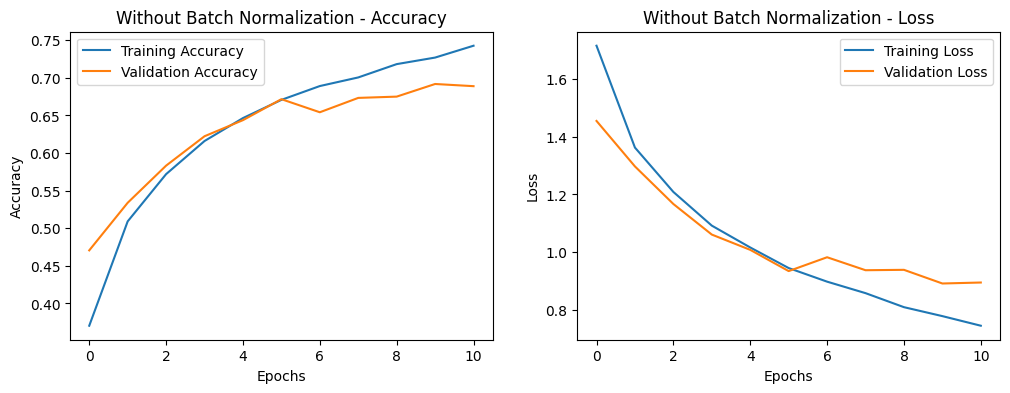

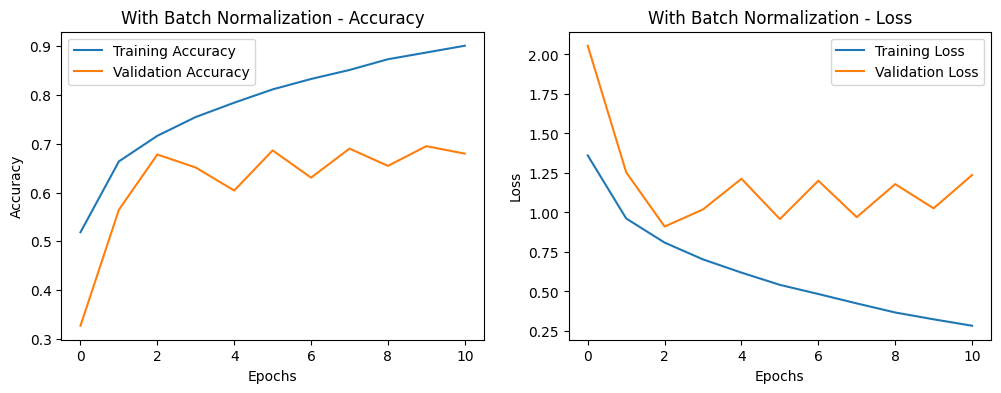

In [ ]:
# Plot accuracy and loss
def plot_performance(history, title):
    plt.figure(figsize=(12, 4))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title} - Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} - Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_performance(history_without_bn, "Without Batch Normalization")
plot_performance(history_with_bn, "With Batch Normalization")

# **Regulirization**


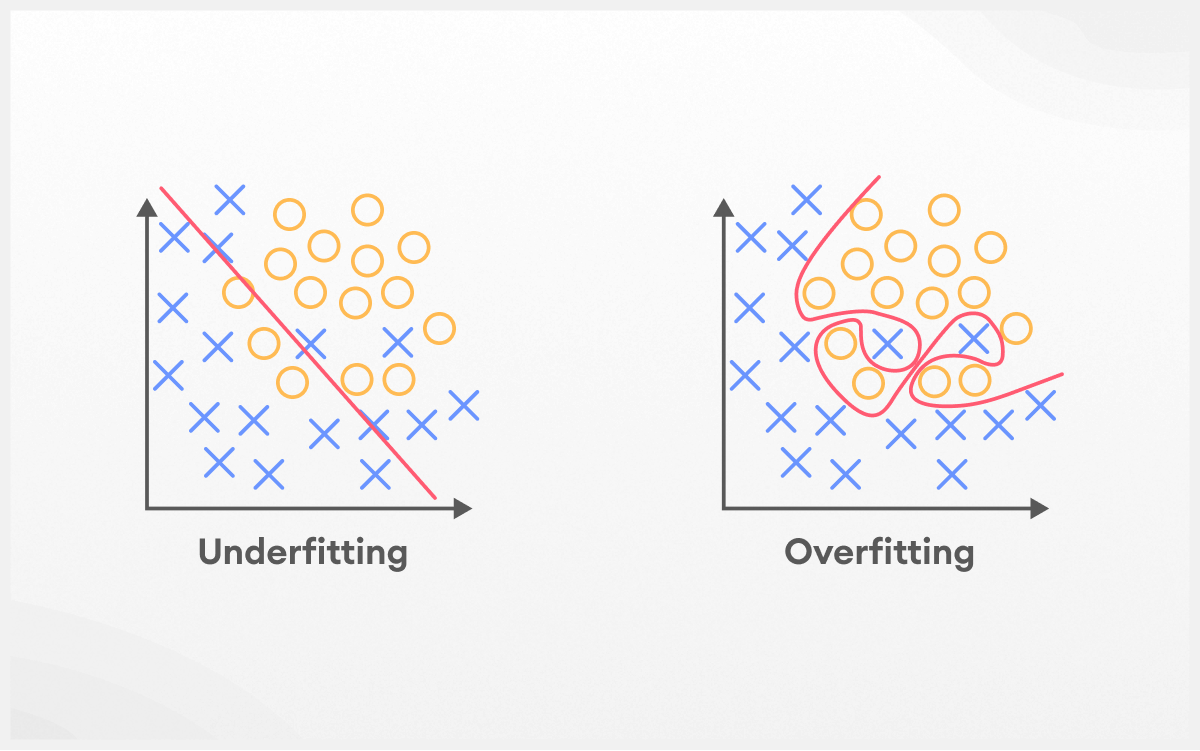

**Overfitting** is characterized by a **high training accuracy** accompanied by a **low testing accuracy**.

Ideally, we aspire to **achieve a smooth curve** that appropriately **fits both the training and testing datasets**, which can be achived using regularization.

Overfitting Curve: Its highly non linear, you can see from the above image how well it has classified all the datapoints into two class, how was it able to do so because of the hidden layers present in the Neural network, when we have multiple hidden layer with large number of neurons,using activation functionsit was able to learn all the complex relations between the train data, but when comes to the test data it failed as it couldn't generalize it's learning on the test data.

Main Objective of Learning: Learn from data but must have the ability to generalize on unseen data.

Ways we can go about this:

Regulirization

# **Optimizers**

These are algorithms that adjust a model's parameters during training by using gradients to minimize the loss function, improving efficiency and stability in the learning process.

SGD with momentum:
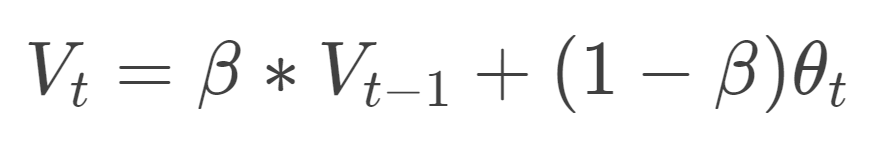

In SGD with momentum, the weight updates are based on both the current gradient and the accumulated past gradients, helping to accelerate convergence and reduce oscillations.

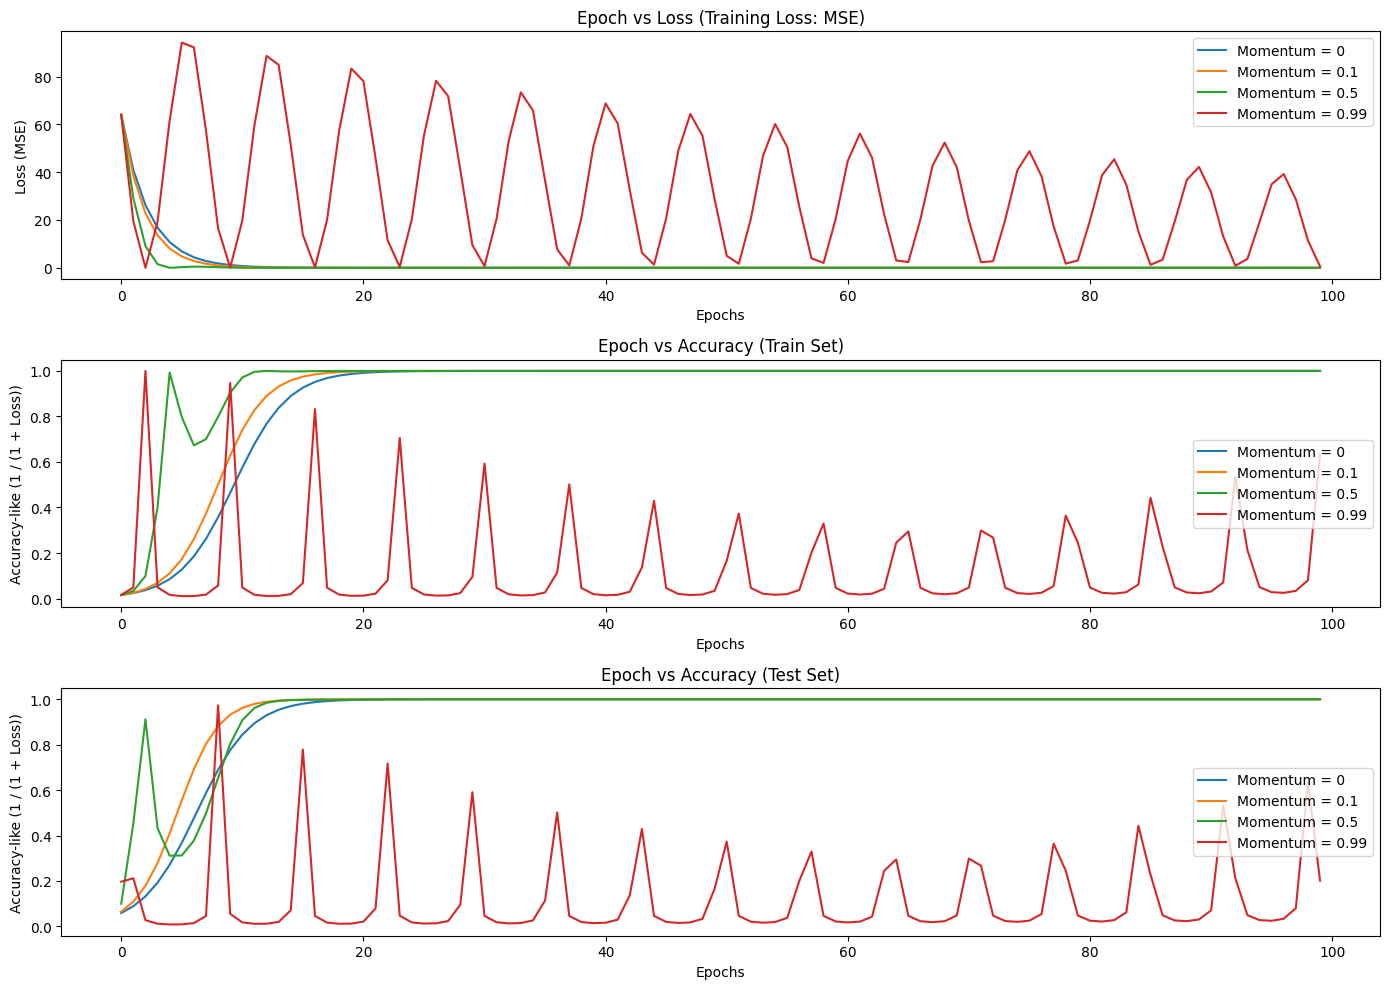

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mean Squared Error Loss Function
def loss_function(x, y_true):
    return (x - y_true)**2  # MSE: (predicted - true)^2

def gradient(x, y_true):
    return 2 * (x - y_true)  # Derivative of (x - y_true)^2

# SGD with Momentum Implementation
def sgd_with_momentum(learning_rate, momentum, epochs, initial_x, test_initial_x, y_true_train, y_true_test):
    # Initialize variables
    x = initial_x
    x_test = test_initial_x  # Start for test set
    velocity = 0  # Initial velocity (momentum term)

    train_loss_history = []  # To store the training loss over epochs
    train_accuracy_history = []  # To store accuracy metric for train set
    test_accuracy_history = []  # To store accuracy metric for test set

    for epoch in range(epochs):
        # Calculate gradient for train set
        grad = gradient(x, y_true_train)

        # Update velocity with momentum for train set
        velocity = momentum * velocity - learning_rate * grad

        # Update x (training parameter) using the velocity
        x += velocity

        # Calculate and store the loss for the training set
        train_loss = loss_function(x, y_true_train)
        train_loss_history.append(train_loss)

        # Calculate train accuracy (1 / (1 + loss))
        train_accuracy = 1 / (1 + train_loss)
        train_accuracy_history.append(train_accuracy)

        # Simulate test accuracy (using x_test which starts at a different value)
        test_grad = gradient(x_test, y_true_test)  # Calculate gradient for test set

        # Update velocity for test set
        test_velocity = momentum * velocity - learning_rate * test_grad
        x_test += test_velocity

        # Calculate test accuracy (1 / (1 + loss))
        test_loss = loss_function(x_test, y_true_test)
        test_accuracy = 1 / (1 + test_loss)
        test_accuracy_history.append(test_accuracy)

    return train_loss_history, train_accuracy_history, test_accuracy_history

# Hyperparameters
learning_rate = 0.1
epochs = 100
initial_x = 10  # Initial training point
test_initial_x = 5  # Initial test point
y_true_train = 0  # True value for the training set
y_true_test = 0  # True value for the test set
momentum_values = [0, 0.1, 0.5, 0.99]  # Different momentum values

# Create a figure for plotting loss and accuracy for each momentum value
plt.figure(figsize=(14, 10))

# Loop through different momentum values and plot
for momentum in momentum_values:
    train_loss_history, train_accuracy_history, test_accuracy_history = sgd_with_momentum(
        learning_rate, momentum, epochs, initial_x, test_initial_x, y_true_train, y_true_test
    )

    # Plot Epoch vs Loss
    plt.subplot(3, 1, 1)
    plt.plot(train_loss_history, label=f'Momentum = {momentum}')
    plt.title("Epoch vs Loss (Training Loss: MSE)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()

    # Plot Epoch vs Train Accuracy
    plt.subplot(3, 1, 2)
    plt.plot(train_accuracy_history, label=f'Momentum = {momentum}')
    plt.title("Epoch vs Accuracy (Train Set)")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy-like (1 / (1 + Loss))")
    plt.legend()

    # Plot Epoch vs Test Accuracy
    plt.subplot(3, 1, 3)
    plt.plot(test_accuracy_history, label=f'Momentum = {momentum}')
    plt.title("Epoch vs Accuracy (Test Set)")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy-like (1 / (1 + Loss))")
    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()




Conclusions for the above data:

- Having **no momentum**  is fine.

- **Adding some momentum** is good. The more momentum we add (the larger the beta parameter), the better the performance becomes, and the faster the training process is.

- However, there is a limit. If the **beta parameter becomes too large**, we reach a point where the model is no longer learning effectively.

- Beyond this point, the performance starts to **deteriorate** and becomes **really awful**.


Let's look at Adam and RMSprop

RMSprop:
The step size (or learning rate) depends on the history of gradient magnitudes.

Larger gradient -> small step

Smaller gradient -> large step



Adam Optimizer: Combination of gradient
descent with momentum and the RMSprop optimizer

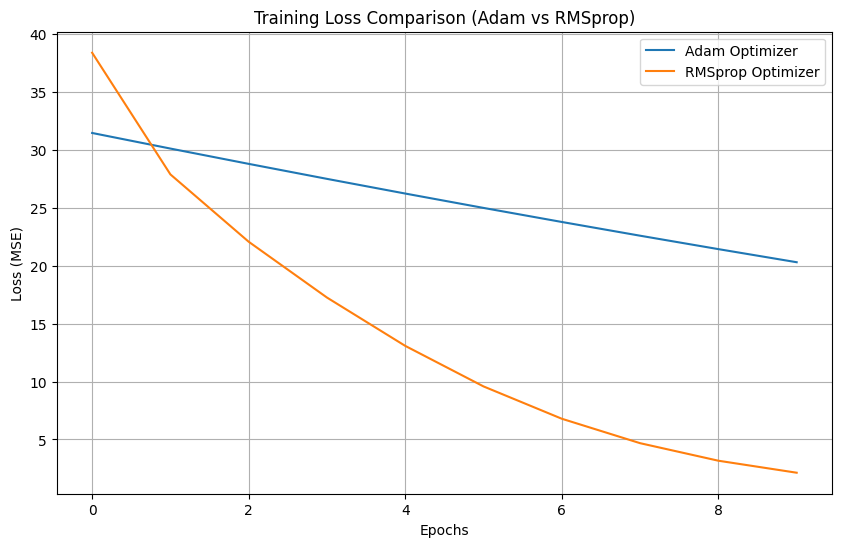

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input layer (1 input feature, 10 hidden units)
        self.fc2 = nn.Linear(10, 1)  # Output layer (1 output feature)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Data
torch.manual_seed(42)
X = torch.linspace(-5, 5, 100).view(-1, 1)
y = 2 * X + torch.randn_like(X) * 0.5

# Initialize the model
model = SimpleNN()

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Training settings
epochs = 10
learning_rate = 0.01

# Prepare figure for plotting the loss
plt.figure(figsize=(10, 6))

# Function to train and evaluate the model
def train_model(optimizer_name):
    optimizer = None
    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        # ''' Optim module in pytorch provides us with optimizer algorithms
        #     optim.Adam implements Adam optimization
        #     Model.parameters => weights and bias of the model
        #     These parameters will be updated by the optimizer
        # '''
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

    # Reset the model weights and bias
    model.apply(reset_weights)

    # Store loss history for plotting
    loss_history = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X)

        # Compute loss
        loss = criterion(y_pred, y)

        # Backward pass
        loss.backward()

        # Optimizer step
        optimizer.step()

        # ''' In the above line we are updating model parameter's '''

        # Save loss for plotting
        loss_history.append(loss.item())

    return loss_history

# Reset model weights after each optimizer run
def reset_weights(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()

# Train using Adam optimizer
adam_loss = train_model("Adam")

# Train using RMSprop optimizer
rmsprop_loss = train_model("RMSprop")

# Plot the training loss for both optimizers
plt.plot(adam_loss, label='Adam Optimizer')
plt.plot(rmsprop_loss, label='RMSprop Optimizer')
plt.title('Training Loss Comparison (Adam vs RMSprop)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()
